# Pre-processing LinkedIn Files

Following are the list of files gathered by linkedIn:

1. Visitor stats
2. Updates
3. Followers


Following files will be combined to draw - Engagement insights

**Engagement Insights:**
Draw insight on:
<ul>
    <li>total page views to date,</li>
    <li> total unique visitors to </li>
    <li> average engagement rate </li>
    <li> linked In posts </li>
</ul>


**Visitor Insights:**
Draw insight on visitor demographics:
<ul>
    <li> Location of visitors </li>
    <li> Visitor by industry </li>
 </ul>
 
**Follower Insights:**
Draw insight on follower demographics:
<ul>
    <li> Location of followers </li>
    <li> Follower Industry </li>
 </ul>
 

## Import Libraries

In [119]:
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import csv


### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

# Replace with your information
plotly.tools.set_credentials_file(username='mchivuku', api_key='ONCxWI3IjbPiHtld9PFm')
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py

# Cufflinks wrapper on plotly
import cufflinks


# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

%matplotlib inline
plt.style.use("seaborn")



## Settings

In [167]:
raw_data_dir = os.path.join("data","raw_data","iu-bloomington")
processed_data_dir = os.path.join("data","processed_data","iu-bloomington")

visitor_file =  "indiana-university-bloomington_visitors_1560259203300.xls"
followers_file = "indiana-university-bloomington_followers_1560260208689.xls"
engagements_file = "indiana-university-bloomington_updates_1560260253072.xls"

start_date = date(2018, 6, 8)  # start date
end_date = date(2019, 6, 9)    # end date


## Read from
visitors_file_path = os.path.join(raw_data_dir,visitor_file )
followers_file_path = os.path.join(raw_data_dir,followers_file )
engagements_file_path = os.path.join(raw_data_dir, engagements_file)


## Save to Engagement insights
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
engagement_insights_filename = f"indiana-university-bl_engagement_insights_{timestamp}.csv"
engagement_insights_filepath = os.path.join(processed_data_dir,engagement_insights_filename)

engagement_top_posts_filename = f"indiana-university-bl_engagement_insights_posts_{timestamp}.csv"
engagement_top_posts_filepath = os.path.join(processed_data_dir,engagement_top_posts_filename)


### Visitor Demographic Insights
visitor_demographics_location_filename = f"indiana-university-bl_visitor_demographics_location_{timestamp}.csv"
visitor_demographics_industry_filename = f"indiana-university-bl_visitor_demographics_industry_{timestamp}.csv"
visitor_demographics_location_filepath = os.path.join(processed_data_dir,visitor_demographics_location_filename)
visitor_demographics_industry_filepath = os.path.join(processed_data_dir,visitor_demographics_industry_filename)


### Follower Demographic insights
follower_demographics_location_filename = f"indiana-university-bl_follower_demographics_location_{timestamp}.csv"
follower_demographics_industry_filename = f"indiana-university-bl_follower_demographics_industry_{timestamp}.csv"
follower_demographics_seniority_filename = f"indiana-university-bl_follower_demographics_seniority_{timestamp}.csv"

follower_demographics_location_filepath = os.path.join(processed_data_dir,follower_demographics_location_filename)
follower_demographics_industry_filepath = os.path.join(processed_data_dir,follower_demographics_industry_filename)
follower_demographics_seniority_filepath = os.path.join(processed_data_dir,follower_demographics_seniority_filename)



## Exploratory Data Analysis (EDA)

In [3]:
visitors = pd.ExcelFile(visitors_file_path)
engagements = pd.ExcelFile(engagements_file_path)
followers = pd.ExcelFile(followers_file_path)


### Visitors

In [5]:
print(visitors.sheet_names)

['Visitor metrics', 'Location', 'Job function', 'Seniority', 'Industry', 'Company size', 'Life Page Traffic']


In [7]:
visitor_metrics_df = pd.read_excel(visitors_file_path, sheet_name='Visitor metrics')
visitor_location_df = pd.read_excel(visitors_file_path,sheet_name = "Location")
visitor_job_function_df = pd.read_excel(visitors_file_path,sheet_name = "Job function")
visitor_industry_df = pd.read_excel(visitors_file_path,sheet_name= "Industry")
visitor_company_size_df = pd.read_excel(visitors_file_path, sheet_name = "Company size")
visitor_seniority_df = pd.read_excel(visitors_file_path,sheet_name = "Seniority")


## Setting Date as index
visitor_metrics_df["Date"]= pd.to_datetime(visitor_metrics_df["Date"]) 


In [10]:
print("Min date:", visitor_metrics_df['Date'].min(), " Max date:", visitor_metrics_df["Date"].max())
print(f"Number of records, in visitor metrics: {visitor_metrics_df.shape}")
print(f"Number of records, in visitor location: {visitor_location_df.shape}")
print(f"Number of records, in visitor job function: {visitor_job_function_df.shape}")
print(f"Number of records, in visitor industry: {visitor_industry_df.shape}")
print(f"Number of records, in visitor company size: {visitor_company_size_df.shape}")
print(f"Number of records, in visitor seniority: {visitor_seniority_df.shape}")




Min date: 2018-06-08 00:00:00  Max date: 2019-06-09 00:00:00
Number of records, in visitor metrics: (367, 25)
Number of records, in visitor location: (225, 2)
Number of records, in visitor job function: (26, 2)
Number of records, in visitor industry: (130, 2)
Number of records, in visitor company size: (9, 2)
Number of records, in visitor seniority: (10, 2)


In [12]:
page_views_df = visitor_metrics_df[['Total page views (desktop)', 'Total page views (mobile)','Total unique visitors (mobile)',
                                    'Total unique visitors (desktop)',
          'Date']].set_index('Date').resample('M').mean()

page_views_df.iplot(
    kind='line',
    xTitle='Date',
    yTitle='Average Views',
    title='Monthly Page Views')

In [31]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]
visitor_industry_df.iplot(x='Total views', y='Industry',  kind='bubble2d', xTitle='Total views', yTitle='Industry',
           theme='pearl', size='Total views',
         categories='Industry', title='Plot Sized by Total Views and Colored by Industry')

### Updates or Engagements

In [13]:
print(engagements.sheet_names)

['Update metrics (aggregated)', 'Update engagement']


In [14]:
engagement_metrics_aggregate_df = pd.read_excel(engagements_file_path,sheet_name = 'Update metrics (aggregated)')
engagement_metrics_update_df = pd.read_excel(engagements_file_path,sheet_name = 'Update engagement')

##### Fix the Header

In [25]:
## Fix the Header
new_header = engagement_metrics_update_df.iloc[0] #grab the first row for the header
engagement_metrics_update_df = engagement_metrics_update_df[1:] #take the data less the header row
engagement_metrics_update_df.columns = new_header #set the header row as the df header


new_header_agg = engagement_metrics_aggregate_df.iloc[0] #grab the first row for the header
engagement_metrics_aggregate_df = engagement_metrics_aggregate_df[1:] #take the data less the header row
engagement_metrics_aggregate_df.columns = new_header_agg #set the header row as the df header


In [26]:
engagement_metrics_update_df.columns, engagement_metrics_aggregate_df.columns

(Index(['Update title', 'Update link', 'Update type', 'Campaign name',
        'Posted by', 'Created date', 'Campaign start date', 'Campaign end date',
        'Audience', 'Impressions', 'Video views', 'Clicks',
        'Click through rate (CTR)', 'Likes', 'Comments', 'Shares', 'Follows',
        'Engagement rate'],
       dtype='object', name=0),
 Index(['Date', 'Impressions (organic)', 'Impressions (sponsored)',
        'Impressions (total)', 'Unique impressions (organic)',
        'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
        'Likes (organic)', 'Likes (sponsored)', 'Likes (total)',
        'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
        'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
        'Engagement rate (organic)', 'Engagement rate (sponsored)',
        'Engagement rate (total)'],
       dtype='object', name=0))

In [22]:
engagement_metrics_update_df["Created date"] = pd.to_datetime(engagement_metrics_update_df["Created date"])

In [24]:
print("Min date:", engagement_metrics_update_df["Created date"].min(), " Max date:", engagement_metrics_update_df["Created date"].max())
print(f"No of records: {engagement_metrics_update_df.shape}")

Min date: 2018-06-26 00:00:00  Max date: 2019-06-08 00:00:00
No of records,(177, 18)


In [59]:
engagement_metrics_aggregate_df.head(),engagement_metrics_aggregate_df.columns

(0       Date Impressions (organic) Impressions (sponsored)  \
 1 2018-06-08                  5313                       0   
 2 2018-06-09                  3486                       0   
 3 2018-06-10                  3535                       0   
 4 2018-06-11                  5349                       0   
 5 2018-06-12                  4951                       0   
 
 0 Impressions (total) Unique impressions (organic) Clicks (organic)  \
 1                5313                         2393               55   
 2                3486                         1669               35   
 3                3535                         1653               39   
 4                5349                         2306               47   
 5                4951                         2015               46   
 
 0 Clicks (sponsored) Clicks (total) Likes (organic) Likes (sponsored)  \
 1                  0             55              20                 0   
 2                  0             35  

In [34]:
engagement_metrics_aggregate_df["Date"] = pd.to_datetime(engagement_metrics_aggregate_df["Date"])

In [88]:
# determine the percent of missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

percent_missing(engagement_metrics_aggregate_df)

{'Date': 0.0,
 'Impressions (organic)': 0.0,
 'Impressions (sponsored)': 0.0,
 'Impressions (total)': 0.0,
 'Unique impressions (organic)': 0.0,
 'Clicks (organic)': 0.0,
 'Clicks (sponsored)': 0.0,
 'Clicks (total)': 0.0,
 'Likes (organic)': 0.0,
 'Likes (sponsored)': 0.0,
 'Likes (total)': 0.0,
 'Comments (organic)': 0.0,
 'Comments (sponsored)': 0.0,
 'Comments (total)': 0.0,
 'Shares (organic)': 0.0,
 'Shares (sponsored)': 0.0,
 'Shares (total)': 0.0,
 'Engagement rate (organic)': 0.0,
 'Engagement rate (sponsored)': 0.0,
 'Engagement rate (total)': 0.0}

In [82]:
#engagement_metrics_aggregate_df.set_index("Date")
engagement_metrics_aggregate_df.groupby(engagement_metrics_aggregate_df['Date'].dt.strftime('%B'))['Engagement rate (total)'].describe()

,count,unique,top,freq
Date,,,,
April,30.0,30.0,0.047926,1.0
August,31.0,31.0,0.019706,1.0
December,31.0,31.0,0.088166,1.0
February,28.0,28.0,0.026203,1.0
January,31.0,31.0,0.035781,1.0
July,31.0,31.0,0.017767,1.0
June,32.0,32.0,0.016434,1.0
March,31.0,31.0,0.021510,1.0
May,31.0,31.0,0.040334,1.0


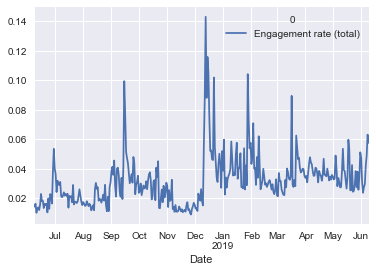

In [98]:
engagement_metrics_aggregate_df[["Engagement rate (total)","Date"]].set_index("Date").plot()

In [100]:
engagement_metrics_update_df.columns

Index(['Update title', 'Update link', 'Update type', 'Campaign name',
       'Posted by', 'Created date', 'Campaign start date', 'Campaign end date',
       'Audience', 'Impressions', 'Video views', 'Clicks',
       'Click through rate (CTR)', 'Likes', 'Comments', 'Shares', 'Follows',
       'Engagement rate'],
      dtype='object', name=0)

In [103]:
engagement_metrics_update_df.sort_values(by='Engagement rate',ascending=False).loc[:20,'Update title']

74     Find out who'll be speaking at Indiana Univers...
107                                           It's true.
161    IU's Kelley School of Business was just ranked...
1      🚨BIG NEWS🚨 \n\nIndiana University is acquiring...
58     This Indiana University - Kelley School of Bus...
42     Six alumni of the Indiana University - Kelley ...
23     Sometimes a college career doesn't progress in...
83     For the third time in four years, the Paul H. ...
175    "Few cities, large or small, offer more than B...
114    Having an impact, changing lives, making a dif...
112    This IU alumnus and his partner just created a...
126    Meet the Indiana University Office of the Bice...
2      College is more than a collection of classes a...
34     Our hearts are with the family and friends of ...
150    For the fourth consecutive year, Indiana Unive...
90     Today the IU School of Public and Environmenta...
10     IU researchers have created a powerful new mol...
131    \nWe're constantly in aw

### Followers

In [29]:
print(followers.sheet_names)

['New followers', 'Location', 'Job function', 'Seniority', 'Industry', 'Company size']


In [99]:
new_followers_df = pd.read_excel(followers_file_path, sheet_name='New followers')
followers_location_df = pd.read_excel(followers_file_path,sheet_name = "Location")
followers_job_function_df = pd.read_excel(followers_file_path,sheet_name = "Job function")
followers_industry_df = pd.read_excel(followers_file_path,sheet_name= "Industry")
followers_company_size_df = pd.read_excel(followers_file_path, sheet_name = "Company size")
followers_seniority_df = pd.read_excel(followers_file_path,sheet_name = "Seniority")


In [104]:
print("Min date:", new_followers_df['Date'].min(), " Max date:", new_followers_df["Date"].max())
print(f"Number of records, in followers metrics: {new_followers_df.shape}")
print(f"Number of records, in followers location: {followers_location_df.shape}")
print(f"Number of records, in followers job function: {followers_job_function_df.shape}")
print(f"Number of records, in followers industry: {followers_industry_df.shape}")
print(f"Number of records, in followers company size: {followers_company_size_df.shape}")
print(f"Number of records, in followers seniority: {followers_seniority_df.shape}")



Min date: 01/01/2019  Max date: 12/31/2018
Number of records, in followers metrics: (367, 4)
Number of records, in followers location: (99, 2)
Number of records, in followers job function: (26, 2)
Number of records, in followers industry: (99, 2)
Number of records, in followers company size: (9, 2)
Number of records, in followers seniority: (10, 2)


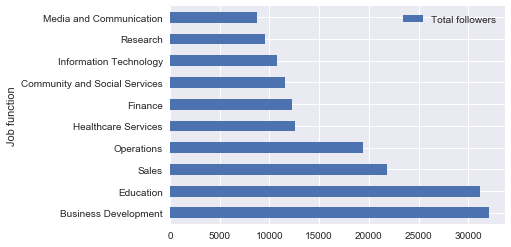

In [105]:
followers_job_function_df.sort_values(by="Total followers",ascending = False)[:10].set_index("Job function").plot(kind="barh")

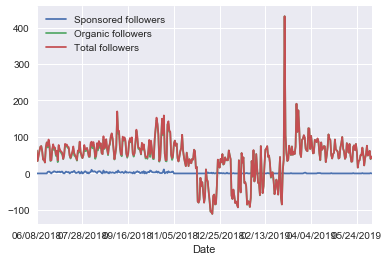

In [108]:
new_followers_df.set_index("Date").plot(kind="line")

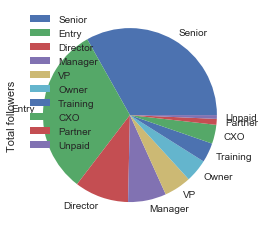

In [109]:
followers_seniority_df.set_index("Seniority").plot.pie(y = "Total followers")


In [116]:
followers_location_df.set_index("Location").sort_values(by="Total followers",ascending=False)[:20]

,Total followers
Location,
"Indianapolis, Indiana Area",56075
"Bloomington, Indiana Area",39203
Greater Chicago Area,36751
Greater New York City Area,13246
Washington D.C. Metro Area,6732
San Francisco Bay Area,6580
Greater Los Angeles Area,6306
"Louisville, Kentucky Area",6282
"Fort Wayne, Indiana Area",5979


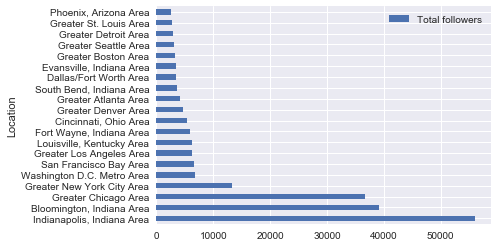

In [118]:
followers_location_df.set_index("Location").sort_values(by="Total followers",ascending=False)[:20].plot(kind="barh")

### Engagement Insights

In [130]:
def make_engagement_insights(file,visitor_metrics_df, engagement_metrics_aggregate_df, new_followers_df):
    csvFile = open(file,"w")
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['Date',
                        'Total page views (desktop)',
                        'Total page views (mobile)',
                        'Total page views (total)',
                        'Total unique visitors (desktop)',
                        'Total unique visitors (mobile)',
                        'Total unique visitors (total)',
                        'Sponsored followers',
                        'Organic followers',
                        'Total followers',
                        'Impressions (organic)', 
                        'Impressions (sponsored)',
                        'Impressions (total)', 
                        'Unique impressions (organic)',
        'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
        'Likes (organic)', 'Likes (sponsored)', 'Likes (total)',
        'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
        'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
        'Engagement rate (organic)', 'Engagement rate (sponsored)',
        'Engagement rate (total)'])


    # days between start and end date
    delta = end_date - start_date  # timedelta

    visitor_metrics_df = visitor_metrics_df.fillna(0)
    engagement_metrics_aggregate_df = engagement_metrics_aggregate_df.fillna(0)
    new_followers_df = new_followers_df.fillna(0)
    
    ## Set Index Date
    visitor_metrics_df["Date"] = pd.to_datetime(visitor_metrics_df["Date"])
    new_followers_df["Date"] = pd.to_datetime(new_followers_df["Date"])
    engagement_metrics_aggregate_df["Date"] = pd.to_datetime(engagement_metrics_aggregate_df["Date"])
    
    visitor_metrics_df = visitor_metrics_df.set_index("Date")
    new_followers_df = new_followers_df.set_index("Date")
    engagement_metrics_aggregate_df = engagement_metrics_aggregate_df.set_index("Date")

    
    for i in range(delta.days + 1):
        metric = []

        date = start_date + timedelta(days=i)

        ## visitor metrics
        v = visitor_metrics_df[visitor_metrics_df.index.date==date]
        metric.append(date)
        metric.append(float(v["Total page views (desktop)"]))
        metric.append(float(v["Total page views (mobile)"]))
        metric.append(float(v["Total page views (total)"]))
        metric.append(float(v["Total unique visitors (desktop)"]))
        metric.append(float(v["Total unique visitors (mobile)"]))
        metric.append(float(v["Total unique visitors (total)"]))

        ## follower metrics

        f = new_followers_df[new_followers_df.index.date==date]
        metric.append(float(f["Sponsored followers"]))
        metric.append(float(f["Organic followers"]))
        metric.append(float(f['Total followers']))

        ## engagement 
        try:
            e = engagement_metrics_aggregate_df[engagement_metrics_aggregate_df.index.date == date]
            metric.append(float(e['Impressions (organic)']))
            metric.append(float(e['Impressions (sponsored)']))
            metric.append(float(e['Impressions (total)']))
            metric.append(float(e['Unique impressions (organic)']))
            metric.append(float(e['Clicks (organic)']))
            metric.append(float(e['Clicks (total)']))
            metric.append(float(e['Clicks (sponsored)']))
            metric.append(float(e['Likes (organic)']))
            metric.append(float(e['Likes (sponsored)']))
            metric.append(float(e['Likes (total)']))
            metric.append(float(e['Comments (organic)']))
            metric.append(float(e['Comments (sponsored)']))
            metric.append(float(e['Comments (total)']))
            metric.append(float(e['Shares (organic)']))
            metric.append(float(e['Shares (sponsored)']))
            metric.append(float(e['Shares (total)']))
            metric.append(float(e['Engagement rate (organic)']))
            metric.append(float(e['Engagement rate (sponsored)']))
            metric.append(float(e['Engagement rate (total)']))
            
        except:   
            for r in range(19):
                metric.append(0)
        csvWriter.writerow(metric)
        
    print("Copying done!",date)    
        

In [131]:
make_engagement_insights(engagement_insights_filepath,visitor_metrics_df,engagement_metrics_aggregate_df,new_followers_df)

Copying done! 2019-06-09


In [133]:
metrics_df  = pd.read_csv(engagement_insights_filepath)
print(f"Number of rows and columns",metrics_df.shape)

Number of rows and columns (367, 29)


In [138]:
metrics_df


,Date,Total page views (desktop),Total page views (mobile),Total page views (total),Total unique visitors (desktop),Total unique visitors (mobile),Total unique visitors (total),Sponsored followers,Organic followers,Total followers,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Likes (organic),Likes (sponsored),Likes (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,2018-06-08,198.0,288.0,486.0,142.0,97.0,239.0,0.0,63.0,63.0,5313.0,0.0,5313.0,2393.0,55.0,55.0,0.0,20.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,0.014305,0.000000,0.014305
1,2018-06-09,61.0,225.0,286.0,46.0,87.0,133.0,0.0,34.0,34.0,3486.0,0.0,3486.0,1669.0,35.0,35.0,0.0,15.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,1.0,0.014630,0.000000,0.014630
2,2018-06-10,69.0,268.0,337.0,54.0,82.0,135.0,0.0,48.0,48.0,3535.0,0.0,3535.0,1653.0,39.0,39.0,0.0,18.0,0.0,18.0,0.0,0.0,0.0,1.0,0.0,1.0,0.016407,0.000000,0.016407
3,2018-06-11,216.0,289.0,505.0,159.0,98.0,257.0,0.0,62.0,62.0,5349.0,0.0,5349.0,2306.0,47.0,47.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010282,0.000000,0.010282
4,2018-06-12,256.0,363.0,619.0,179.0,112.0,290.0,0.0,73.0,73.0,4951.0,0.0,4951.0,2015.0,46.0,46.0,0.0,16.0,0.0,16.0,1.0,0.0,1.0,2.0,0.0,2.0,0.013129,0.000000,0.013129
5,2018-06-13,212.0,340.0,552.0,165.0,104.0,269.0,0.0,75.0,75.0,4590.0,0.0,4590.0,1805.0,46.0,46.0,0.0,15.0,0.0,15.0,1.0,0.0,1.0,2.0,0.0,2.0,0.013943,0.000000,0.013943
6,2018-06-14,230.0,351.0,581.0,172.0,113.0,285.0,0.0,61.0,61.0,3868.0,0.0,3868.0,1585.0,34.0,34.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,2.0,0.0,2.0,0.012151,0.000000,0.012151
7,2018-06-15,142.0,323.0,465.0,103.0,102.0,204.0,0.0,38.0,38.0,2272.0,0.0,2272.0,1042.0,26.0,26.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.015845,0.000000,0.015845
8,2018-06-16,60.0,257.0,317.0,47.0,87.0,134.0,0.0,38.0,38.0,1691.0,0.0,1691.0,785.0,32.0,32.0,0.0,5.0,0.0,5.0,-1.0,0.0,-1.0,3.0,0.0,3.0,0.023063,0.000000,0.023063
9,2018-06-17,69.0,230.0,299.0,48.0,76.0,123.0,0.0,30.0,30.0,1487.0,0.0,1487.0,675.0,22.0,22.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018157,0.000000,0.018157


In [139]:
#engagement_top_posts_filepath

engagement_metrics_update_df.head()

,Update title,Update link,Update type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Video views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate
1,🚨BIG NEWS🚨 \n\nIndiana University is acquiring...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Morgan Campbell,2019-06-08,NaN,NaN,All followers,64796,NaN,2428,0.0374714,1275,22,91,NaN,0.0588925
2,College is more than a collection of classes a...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Clayton Norman,2019-06-07,NaN,NaN,All followers,51769,15607,914,0.0176554,737,85,35,NaN,0.0342097
3,Watch IU President Michael McRobbie discuss th...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Clayton Norman,2019-06-06,NaN,NaN,All followers,9675,NaN,113,0.0116796,36,0,1,NaN,0.0155039
4,Business law and ethics professor and IU-Bloom...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Clayton Norman,2019-06-06,NaN,NaN,All followers,7954,NaN,63,0.00792054,35,1,2,NaN,0.012698
5,The IU Alumni Association is proud to present ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Erin Erwin,2019-06-05,NaN,NaN,All followers,21303,NaN,199,0.00934141,104,0,3,NaN,0.0143642


### Engagement Posts

In [144]:
def make_engagement_posts(file,engagement_metrics_update_df):
    csvFile = open(file,"w")
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['Created date',
                        'Post title',
                        'Post link',
                        'Post type',
                        'Impressions',
                        'Video views',
                        'Clicks',
                        'Click through rate (CTR)',
                        'Likes',
                        'Comments',
                        'Shares', 
                        'Follows',
        'Engagement rate'])
    
    engagement_metrics_update_df = engagement_metrics_update_df.fillna(0)
    for index, row in engagement_metrics_update_df.iterrows():
        csvWriter.writerow([row["Created date"], row["Update title"],row["Update link"],row["Update type"],
                           row["Impressions"],row["Video views"],row["Clicks"],row["Click through rate (CTR)"],
                           row["Likes"],row["Comments"], row["Shares"],row["Follows"],row["Engagement rate"]
                           ])
    
    print("Copying done!",index)

    

    

In [145]:
make_engagement_posts(engagement_top_posts_filepath,engagement_metrics_update_df)

Copying done! 177


In [146]:
posts_df  = pd.read_csv(engagement_top_posts_filepath)
print(f"Number of rows and columns",posts_df.shape)

Number of rows and columns (177, 13)


In [147]:
posts_df.head()

,Created date,Post title,Post link,Post type,Impressions,Video views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate
0,2019-06-08 00:00:00,🚨BIG NEWS🚨 \n\nIndiana University is acquiring...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,64796,0,2428,0.037471,1275,22,91,0,0.058893
1,2019-06-07 00:00:00,College is more than a collection of classes a...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,51769,15607,914,0.017655,737,85,35,0,0.034210
2,2019-06-06 00:00:00,Watch IU President Michael McRobbie discuss th...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,9675,0,113,0.011680,36,0,1,0,0.015504
3,2019-06-06 00:00:00,Business law and ethics professor and IU-Bloom...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,7954,0,63,0.007921,35,1,2,0,0.012698
4,2019-06-05 00:00:00,The IU Alumni Association is proud to present ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,21303,0,199,0.009341,104,0,3,0,0.014364


In [149]:
visitor_location_df.head()

,Location,Total views
0,Greater Boston Area,1857
1,Greater Chicago Area,11522
2,"Albany, New York Area",7
3,"Cincinnati, Ohio Area",1352
4,"Cleveland/Akron, Ohio Area",516


### Visitor Demographic Insights

In [168]:
#visitor_demographics_location_filepath,visitor_demographics_industry_filepath
def make_visitor_demographics_location(file,visitor_location_df):
    visitor_location_df.to_csv(file,header=True,index=False)
    print("Copying done!")


In [169]:
make_visitor_demographics_location(visitor_demographics_location_filepath,visitor_location_df)

Copying done!


In [170]:
vl = pd.read_csv(visitor_demographics_location_filepath)
vl.head()

,Location,Total views
0,Greater Boston Area,1857
1,Greater Chicago Area,11522
2,"Albany, New York Area",7
3,"Cincinnati, Ohio Area",1352
4,"Cleveland/Akron, Ohio Area",516


In [171]:
#visitor_demographics_location_filepath,visitor_demographics_industry_filepath
def make_visitor_demographics_industry(file,visitor_industry_df):
    visitor_industry_df.to_csv(file,header=True,index=False)
    print("Copying done!")


In [172]:
make_visitor_demographics_industry(visitor_demographics_industry_filepath,visitor_industry_df)

Copying done!


In [173]:
vl = pd.read_csv(visitor_demographics_industry_filepath)
vl.head()

,Industry,Total views
0,Defense & Space,431
1,Computer Hardware,2
2,Computer Software,3815
3,Computer Networking,115
4,Internet,3469


### Follower Demographics Insights

In [174]:
#follower_demographics_location_filepath,follower_demographics_industry_filepath,follower_demographics_seniority_filepath
def make_csv_from_df(file,df):
    df.to_csv(file,header=True,index=False)
    print("Copying done!")
    


In [175]:
make_csv_from_df(follower_demographics_location_filepath,followers_location_df)
make_csv_from_df(follower_demographics_industry_filepath,followers_industry_df)
make_csv_from_df(follower_demographics_seniority_filepath,followers_seniority_df)


Copying done!
Copying done!
Copying done!


In [176]:
d = pd.read_csv(follower_demographics_location_filepath)
d.head()

,Location,Total followers
0,"Indianapolis, Indiana Area",56075
1,"Bloomington, Indiana Area",39203
2,Greater Chicago Area,36751
3,Greater New York City Area,13246
4,Washington D.C. Metro Area,6732


In [177]:
d = pd.read_csv(follower_demographics_industry_filepath)
d.head()

,Industry,Total followers
0,Higher Education,34653
1,Hospital & Health Care,16691
2,Financial Services,13711
3,Information Technology and Services,12284
4,Education Management,9948


In [178]:
d = pd.read_csv(follower_demographics_seniority_filepath)
d.head()

,Seniority,Total followers
0,Senior,87849
1,Entry,83284
2,Director,26631
3,Manager,18802
4,VP,13359
